.

**NOTE:**
First you need to connect google drive and make my project location into your drive, because we are using the drive to upload the model we are trained.
Here is stepped to put the project location:
1.	Copy the link project’s drive into your drive.
2.	Go to "Shared with me" on your drive.
3.	Click "DACNTT2-70" more => organize => Add Shortcut.
4.	In tab "All location" => choose "My Drive."

Our project is split into multiple stages, a stage has multiple sections, we have 4 main stages, if you want to run, please read be careful which section need to run before.

Noted that in stage 3 & 4, you can modify path & name of model to decide which version of model you want to use for train RL or using for testing:
1.	Run pre-train model B2B: section **1 & 2**.
2.	Run train model minGPT: section **1 & 3 & 4**.
3.	Run train RL using minGPT model: section **1 & 5 & 6 & 7**.
4.	Run test model: section **8 & 9 & 10**.


.

# 1. Preprocessing data
import data and lib necessary

In [ ]:
# IMPORTANT NOTE (if you not use account storage.nguyenducbinh@gmail.com)
# BEFORE mount drive, you should go to "Shared with me" on your drive
# -> Click "DACNTT2-70" more/organize/Add Shorcut
# -> "All location" -> choose "My Drive"
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content

/content


In [ ]:
!git clone -b feature/test-rl https://github.com/ndbinh15/minGPT_QA.git

Cloning into 'minGPT_QA'...
remote: Enumerating objects: 285, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 285 (delta 41), reused 38 (delta 31), pack-reused 236
Receiving objects: 100% (285/285), 77.90 MiB | 10.05 MiB/s, done.
Resolving deltas: 100% (182/182), done.


In [ ]:
cd /content/minGPT_QA/mingpt

/content/minGPT_QA/mingpt


In [ ]:
!pip install -e .

Obtaining file:///content/minGPT_QA/mingpt
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
!pip install stable-baselines3
!pip install 'shimmy>=0.2.1'
!pip install tabulate
!pip install datasets
!pip install rouge_score
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=c4389d3a7d71e8da052954d5ea93cea921836262873d24a245cec77e084d96a8
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 2.2 MB/s eta 0:00:00


In [ ]:
import os
import re
import pandas as pd

import torch
from torch.utils.data import Dataset
from torch.utils.data.dataloader import DataLoader

from mingpt.model import GPT
from mingpt.trainer import Trainer
from mingpt.utils import set_seed, setup_logging, CfgNode as CN

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

import gym
import datasets
from tqdm import tqdm
from tabulate import tabulate
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Specify the directory containing your text files
directory = '/content/minGPT_QA/dataset/ver_2'

# Initialize an empty list to store file contents
data = ""

# List all files in the directory
files = os.listdir(directory)

# Iterate through each file
for file_name in files:
    # Check if the file is a text file
    if file_name.endswith('.txt'):
        # Open the file and read its contents
        with open(os.path.join(directory, file_name), 'r', encoding='utf-8') as file:
            text = file.read()
            data += text
            print(len(text))

print(len(data))
print()

data_copy = data
data = re.sub(r'\n+', '\n', data).strip()
# data = re.sub(r'(?:question|answer):\s*', '', data)
data = re.sub(r'(question|tag|answer):\s*', lambda m: f'[{m.group(1)[0].upper()}] ', data)
print(data[:500])
print()


# Define an empty list to store question, tag, answer triples
triples = []

# Split the text into question-tag-answer segments using regex
question_tag_answer_segments = re.split(r'question:\s*', data_copy)[1:]

# Iterate through each segment
for segment in question_tag_answer_segments:
    if 'answer:' in segment:  # Check if 'answer:' exists
        question, answer = segment.split('answer:')
    else:
        question = segment.strip()  # Assign segment (without answer) to question
        answer = "None"  # Set answer to None if not found

    # Extract tag (if present)
    if 'tag:' in segment:
        question, tag = question.split('tag:')
        tag = tag.strip()  # Remove whitespace from tag
    else:
        tag = "None"  # Set tag to None if not found

    # Remove leading and trailing whitespace from all elements
    question = question.strip()
    answer = answer.strip() if answer else answer  # Strip only if answer exists

    # Add the triple to the list
    triples.append((question, tag, answer))

print(len(triples))
# Print the extracted question, tag, answer triples
for question, tag, answer in triples[:5]:
    print("Question:", question)
    print("Tag:", tag)
    print("Answer:", answer)


    print("------------------")

44578
130719
17623
76971
53190
5432
1503
21885
81200
14893
447994

[Q] Ai có quyền yêu cầu ly hôn?
[T] 04_51_1
[A] Vợ, chồng, cha, mẹ, hoặc người thân thích khi một bên mắc bệnh tâm thần hoặc là nạn nhân của bạo lực gia đình.
[Q] Cha, mẹ hoặc người thân của vợ hoặc chồng có quyền yêu cầu ly hôn trong trường hợp nào?
[T] 04_51_2
[A] Trong trường hợp một bên vợ hoặc chồng mắc bệnh tâm thần hoặc là nạn nhân của bạo lực gia đình
[Q] Khi một bên mắc bệnh tâm lý hoặc bị bạo lực gia đình ai có quyền yêu cầu ly hôn?
[T] 04_51_2
[A] Người thân, cha, mẹ của bên mắc bệnh 

1298
Question: Ai có quyền yêu cầu ly hôn?
Tag: 04_51_1
Answer: Vợ, chồng, cha, mẹ, hoặc người thân thích khi một bên mắc bệnh tâm thần hoặc là nạn nhân của bạo lực gia đình.
------------------
Question: Cha, mẹ hoặc người thân của vợ hoặc chồng có quyền yêu cầu ly hôn trong trường hợp nào?
Tag: 04_51_2
Answer: Trong trường hợp một bên vợ hoặc chồng mắc bệnh tâm thần hoặc là nạn nhân của bạo lực gia đình
------------------
Ques

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def split_to_train_test_data(data):
    train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)
    # val_data, test_data = train_test_split(val_data, test_size=0.5, random_state=42)

    data_to_train = train_data
    data_to_test = val_data

    return data_to_train, data_to_test

# Print example of data

In [ ]:
print(type(triples))
chars = sorted(list(set(data)))
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }

print("triple:\n", triples[:2])
print()
chunk = triples[0][0] #question
print("question:", chunk)
print("tag:", triples[0][1]) #tag
print("answer:", triples[0][2]) #answer
print()

# q, t, a = triples[0]
# print("question:", q)#question
# print("tag:", t) #tag
# print("answer:", a) #answer

dix = [stoi[s] for s in chunk]
print(dix[:-1])
print(dix[1:])
xid = [itos[x] for x in dix]
print(xid[:-1])
print(len(triples), len(data))

<class 'list'>
triple:
 [('Các thành viên gia đình có quyền, nghĩa vụ gì đối với nhau?', '06_103_1', 'Các thành viên gia đình có quyền, nghĩa vụ quan tâm, chăm sóc, giúp đỡ, tôn trọng nhau. Quyền, lợi ích hợp pháp về nhân thân và tài sản của các thành viên gia đình quy định tại Luật Hôn nhân và Gia đình, Bộ luật dân sự và các luật khác có liên quan được pháp luật bảo vệ.'), ('Quyền và nghĩa vụ của các thành viên trong gia đình là gì?', '06_103_1', 'Các thành viên gia đình có quyền, nghĩa vụ quan tâm, chăm sóc, giúp đỡ, tôn trọng nhau. Quyền, lợi ích hợp pháp về nhân thân và tài sản của các thành viên gia đình.')]

question: Các thành viên gia đình có quyền, nghĩa vụ gì đối với nhau?
tag: 06_103_1
answer: Các thành viên gia đình có quyền, nghĩa vụ quan tâm, chăm sóc, giúp đỡ, tôn trọng nhau. Quyền, lợi ích hợp pháp về nhân thân và tài sản của các thành viên gia đình quy định tại Luật Hôn nhân và Gia đình, Bộ luật dân sự và các luật khác có liên quan được pháp luật bảo vệ.

[26, 84, 53, 

In [ ]:
chars = sorted(list(set(data)))
stoi = { ch:i for i,ch in enumerate(chars) }
chunk = data[0:0 + 128 + 1]
print(chunk)
dix = [stoi[s] for s in chunk]
print(dix[:-1])
print(dix[1:])
xid = [itos[x] for x in dix]
print(xid[:-1])
print(len(triples), len(data))

[Q] Các thành viên gia đình có quyền, nghĩa vụ gì đối với nhau?
[T] 06_103_1
[A] Các thành viên gia đình có quyền, nghĩa vụ quan 
[47, 39, 49, 1, 26, 84, 53, 1, 68, 57, 83, 62, 57, 1, 70, 58, 89, 62, 1, 56, 58, 51, 1, 102, 90, 62, 57, 1, 53, 93, 1, 65, 69, 72, 140, 62, 7, 1, 62, 56, 57, 104, 51, 1, 70, 168, 1, 56, 90, 1, 102, 151, 58, 1, 70, 159, 58, 1, 62, 57, 51, 69, 23, 0, 47, 42, 49, 1, 11, 17, 50, 12, 11, 14, 50, 12, 0, 47, 24, 49, 1, 26, 84, 53, 1, 68, 57, 83, 62, 57, 1, 70, 58, 89, 62, 1, 56, 58, 51, 1, 102, 90, 62, 57, 1, 53, 93, 1, 65, 69, 72, 140, 62, 7, 1, 62, 56, 57, 104, 51, 1, 70, 168, 1, 65, 69, 51, 62]
[39, 49, 1, 26, 84, 53, 1, 68, 57, 83, 62, 57, 1, 70, 58, 89, 62, 1, 56, 58, 51, 1, 102, 90, 62, 57, 1, 53, 93, 1, 65, 69, 72, 140, 62, 7, 1, 62, 56, 57, 104, 51, 1, 70, 168, 1, 56, 90, 1, 102, 151, 58, 1, 70, 159, 58, 1, 62, 57, 51, 69, 23, 0, 47, 42, 49, 1, 11, 17, 50, 12, 11, 14, 50, 12, 0, 47, 24, 49, 1, 26, 84, 53, 1, 68, 57, 83, 62, 57, 1, 70, 58, 89, 62, 1, 56, 58,

In [ ]:
# !pip install tiktoken

In [ ]:
# import tiktoken
# enc = tiktoken.get_encoding('gpt2')
# def encode(s):
#   return enc.encode(s)

# def decode(arr):
#   return enc.decode(arr)

# vocab_size = enc.n_vocab
# print(vocab_size)



---


# 2. Prepare & pretrain B2B


In [ ]:
!pip install git-python==1.0.3
!pip install sacrebleu
!pip install rouge_score
!pip install datasets
!pip install transformers
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=77bbfd30a7c11948ff5b87877b4ab070a0723f2a279b5757e8ed4299934c4b80
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 6.5 MB/s eta 0:00:00


In [ ]:
# Let's import the library.
import datasets
from pprint import pprint
from transformers import BertTokenizerFast, BertTokenizer
from transformers import EncoderDecoderModel
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
from transformers import TrainingArguments
#from transformers.trainer_utils import get_last_checkpoint
from dataclasses import dataclass, field
from typing import Optional
from sacrebleu import corpus_bleu

from sklearn.model_selection import train_test_split

In [ ]:
def load_data_b2b(data, split):
    inputs = []
    outputs = []
    out_tag = []
    train_data, val_test_data = train_test_split(data, test_size=0.2, random_state=42)
    val_data, test_data = train_test_split(val_test_data, test_size=0.5, random_state=42)

    # print(train_data[:5])
    # print(val_data[:5])
    # print(test_data[:5])

    if split == "train":
      data = train_data
      print(len(data))
    if split == "validation":
      data = val_data
      print(len(data))
    if split == "test":
      data = test_data
      print(len(data))

    for i in range(len(data)):
        question, tag, answer = data[i]
        inputs.append(question)
        outputs.append(answer)
        out_tag.append(tag)

    # print(inputs[:5])
    # print(outputs[:5])

    return datasets.Dataset.from_dict({"input": inputs, "output": outputs})


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
load_data_b2b(triples, "test")

104


Dataset({
    features: ['input', 'output'],
    num_rows: 104
})

In [ ]:
batch_size = 64
encoder_max_length=32
decoder_max_length=32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = BertTokenizerFast.from_pretrained("bert-base-multilingual-cased")

def process_data_to_model_inputs(batch):
  # tokenize the inputs and labels
  inputs = tokenizer(batch["input"], padding="max_length", truncation=True, max_length=encoder_max_length)
  outputs = tokenizer(batch["output"], padding="max_length", truncation=True, max_length=decoder_max_length)

  batch["input_ids"] = inputs.input_ids
  batch["attention_mask"] = inputs.attention_mask
  batch["decoder_attention_mask"] = outputs.attention_mask
  batch["labels"] = outputs.input_ids.copy()

  # because BERT automatically shifts the labels, the labels correspond exactly to `decoder_input_ids`.
  # We have to make sure that the PAD token is ignored
  batch["labels"] = [[-100 if token == tokenizer.pad_token_id else token for token in labels] for labels in batch["labels"]]

  return batch

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
train_data = load_data_b2b(triples, "train")
train_data = train_data.map(
      process_data_to_model_inputs,
      batched=True,
      batch_size=batch_size,
      remove_columns=["input", "output"]
  )

train_data.set_format(
      type="torch",
      columns=["input_ids", "attention_mask", "decoder_attention_mask", "labels"],
)

val_data = load_data_b2b(triples, "validation")
val_data = val_data.map(
      process_data_to_model_inputs,
      batched=True,
      batch_size=batch_size,
      remove_columns=["input", "output"]
  )

val_data.set_format(
      type="torch",
      columns=["input_ids", "attention_mask", "decoder_attention_mask", "labels"],
)

831


Map:   0%|          | 0/831 [00:00<?, ? examples/s]

104


Map:   0%|          | 0/104 [00:00<?, ? examples/s]

In [ ]:
bert2bert = EncoderDecoderModel.from_encoder_decoder_pretrained("bert-base-multilingual-cased", "bert-base-multilingual-cased", tie_encoder_decoder=False).to(device)

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertLMHeadModel were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['bert.encoder.layer.0.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.0.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.0.crossattention.output.dense.bias', 'bert.encoder.layer.0.crossattention.output.dense.weight', 'bert.encoder.layer.0.crossattention.self.key.bias', 'bert.encoder.layer.0.crossattention.self.key.weight', 'bert.encoder.layer.0.crossattention.self.query.bias', 'bert.encoder.layer.0.crossattention.self.query.weight', 'bert.encoder.layer.0.crossattention.self.value.bias', 'bert.encoder.layer.0.crossattention.self.value.weight', 'bert.encoder.layer.1.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.1.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.1.crossattention.output.dense.bias', 'bert.encoder.layer.1.crossattention.output.dense.weight', 'bert.encoder.layer.1.crossattention.self.key.bia

In [ ]:
# bert2bert.config

In [ ]:
bert2bert.config.decoder_start_token_id = tokenizer.cls_token_id
bert2bert.config.eos_token_id = tokenizer.sep_token_id
bert2bert.config.pad_token_id = tokenizer.pad_token_id
bert2bert.config.vocab_size = bert2bert.config.encoder.vocab_size

In [ ]:
bert2bert.config.max_length = 32
bert2bert.config.early_stopping = False
bert2bert.config.num_beams = 1

In [ ]:
rouge_metric = datasets.load_metric("rouge")
sacrebleu_metric = datasets.load_metric('sacrebleu')

def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = tokenizer.batch_decode(pred_ids)
    labels_ids[labels_ids == -100] = tokenizer.pad_token_id
    label_str = tokenizer.batch_decode(labels_ids)

    # print("pred_str", pred_str)
    # print("label_str", label_str)

    rouge_output = rouge_metric.compute(predictions=pred_str, references=label_str, rouge_types=["rouge2"])["rouge2"].mid
    bleu_output = sacrebleu_metric.compute(predictions=pred_str, references=[[label] for label in label_str])
    # s_bleu = sentence_bleu([ref_tokens], gen_tokens, smoothing_function=smoothie)

    return {
        "bleu": round(bleu_output["score"], 4),
        "rouge2_precision": round(rouge_output.precision, 4),
        "rouge2_recall": round(rouge_output.recall, 4),
        "rouge2_fmeasure": round(rouge_output.fmeasure, 4),
    }

<ipython-input-22-75d5694b0617>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge_metric = datasets.load_metric("rouge")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for rouge contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/rouge/rouge.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for sacrebleu contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/sacrebleu/sacrebleu.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    fp16=True,
    output_dir="/content/b2b",
    logging_steps=1,
    save_steps=500,
    evaluation_strategy="epoch",#"steps"
    eval_steps=10,
    warmup_steps=100,
    save_total_limit=5,
    num_train_epochs=100
)

# instantiate trainer
trainer = Seq2SeqTrainer(
    model=bert2bert,
    tokenizer=tokenizer,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_data,
    eval_dataset=val_data
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
'''
last_checkpoint = get_last_checkpoint(training_args.output_dir)

if last_checkpoint is None:
  print("Output directory already exists and is not empty.")
else:
  print(f"Checkpoint detected, resuming training at {last_checkpoint}.")
'''
trainer_result = trainer.train()

trainer.save_model()

/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:636: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


Epoch,Training Loss,Validation Loss,Bleu,Rouge2 Precision,Rouge2 Recall,Rouge2 Fmeasure
1,9.734200,8.496675,0.431300,0.000000,0.000000,0.000000
2,6.706500,6.418232,1.155900,0.000000,0.000000,0.000000
3,5.520100,5.306096,0.768600,0.000000,0.000000,0.000000
4,4.652600,4.252924,0.768600,0.000000,0.000000,0.000000
5,3.694600,3.299523,0.768600,0.000000,0.000000,0.000000
6,3.068600,2.800150,0.768600,0.000000,0.000000,0.000000
7,2.559800,2.468194,0.768600,0.000000,0.000000,0.000000
8,2.020100,2.227767,3.767300,0.032800,0.032100,0.032300
9,1.849000,1.986293,3.362200,0.021700,0.021400,0.021600
10,1.497700,1.856225,2.691500,0.022300,0.020100,0.021000


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1339: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 32}
Removed shared tensor {'decoder.cls.predictions.decoder.weight', 'decoder.cls.predictions.decoder.bias'} while saving. This should be OK, but check by verifying that you don't receive any warning while reload

In [ ]:
#model = EncoderDecoderModel.from_pretrained("./checkpoint-2")
#model.to("cuda")

test_data = load_data_b2b(triples, "test")

# map data correctly
def generate_summary(batch):
    # cut off at BERT max length 512
    inputs = tokenizer(batch["input"], padding="max_length", truncation=True, max_length=encoder_max_length, return_tensors="pt")
    input_ids = inputs.input_ids.to("cuda")
    attention_mask = inputs.attention_mask.to("cuda")

    outputs = bert2bert.generate(input_ids, attention_mask=attention_mask)

    output_str = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    batch["pred"] = output_str

    return batch


results = test_data.map(generate_summary, batched=True, batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


104


Parameter 'function'=<function generate_summary at 0x78d8745f36d0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/104 [00:00<?, ? examples/s]

In [ ]:
#sacrebleu_metric = datasets.load_metric('sacrebleu')

pred_str = results["pred"]
label_str = results["output"]

rouge_output = rouge_metric.compute(predictions=pred_str, references=label_str, rouge_types=["rouge2"])["rouge2"].mid
bleu_output = sacrebleu_metric.compute(predictions=pred_str, references=[[lbl] for lbl in label_str])
bleu_output1 = corpus_bleu(pred_str , [label_str])

print(rouge_output, bleu_output, bleu_output1)

Score(precision=0.4630333853833067, recall=0.31790944319345704, fmeasure=0.3504473817948104) {'score': 8.298999533114829, 'counts': [1405, 1081, 906, 792], 'totals': [2109, 2030, 1951, 1872], 'precisions': [66.61925082977714, 53.251231527093594, 46.43772424397745, 42.30769230769231], 'bp': 0.1615179610773388, 'sys_len': 2109, 'ref_len': 5954} BLEU = 8.30 66.6/53.3/46.4/42.3 (BP = 0.162 ratio = 0.354 hyp_len = 2109 ref_len = 5954)


In [ ]:
# results["pred"] = "A"

In [ ]:
pred_str[:10]

['Ông bà nội, ông bà ngoại có nghĩa vụ cấp dưỡng cho cháu trong trường hợp cháu chưa thành niên hoặc thành niên không có khả năng lao',
 'Trong trường hợp vợ, chồng đưa tài sản chung vào kinh doanh, áp dụng quy định tại Điều 36 của Luật này.',
 'Theo Điều 76, việc giải quyết tài sản riêng của con do cha mẹ quản lý.',
 'Nội dung cơ bản của thỏa thuận về chế độ tài sản bao gồm : a ) Tài sản được xác định là tài sản chung, tài sản',
 'Thời kỳ hôn nhân là khoảng thời gian tồn tại quan hệ vợ chồng, được tính từ ngày đăng ký kết hôn đến ngày chấm dứt hôn nhân',
 '',
 'Có, con được nhận là cha, mẹ của một người có thể yêu cầu Tòa án xác định người đó không phải là con mình.',
 'Một bên vợ hoặc chồng bị Tòa án tuyên bố mất tích và phía bên kia yêu cầu ly hôn.',
 'Quan hệ hôn nhân và gia đình được xác lập và thực hiện theo quy định của Luật này, được thực hiện theo quy định của Luật này',
 'Điều 99 Luật Hôn nhân và gia đình năm 2014 quy định Giải quyết tranh chấp liên quan đến việc sinh con bằn

In [ ]:
label_str[:10]

['Cháu chưa thành niên và không có anh, chị cấp dưỡng.',
 'Trong trường hợp vợ, chồng đưa tài sản chung vào kinh doanh, áp dụng quy định tại Điều 36 của Luật này.',
 'Điều 77 Luật Hôn nhân và gia đình năm 2014 quy định Định đoạt tài sản riêng của con chưa thành niên, con đã thành niên mất năng lực hành vi dân sự như sau: 1. Trường hợp cha mẹ hoặc người giám hộ quản lý tài sản riêng của con dưới 15 tuổi thì có quyền định đoạt tài sản đó vì lợi ích của con, nếu con từ đủ 09 tuổi trở lên thì phải xem xét nguyện vọng của con. 2. Con từ đủ 15 tuổi đến dưới 18 tuổi có quyền định đoạt tài sản riêng, trừ trường hợp tài sản là bất động sản, động sản có đăng ký quyền sở hữu, quyền sử dụng hoặc dùng tài sản để kinh doanh thì phải có sự đồng ý bằng văn bản của cha mẹ hoặc người giám hộ. 3. Trong trường hợp con đã thành niên mất năng lực hành vi dân sự thì việc định đoạt tài sản riêng của con do người giám hộ thực hiện.',
 'Nội dung cơ bản của thỏa thuận về chế độ tài sản bao gồm: a) Tài sản được x

In [ ]:
aaa = [[l] for l in label_str[:10]]
corpus_bleu(pred_str[:10], aaa).score

12.504923479630667

In [ ]:
sentence_bleu([label_str], pred_str, weights=(1.0,0,0,0), smoothing_function=SmoothingFunction().method1)

0.03846153846153846

In [ ]:
score = 0
for a, b in zip(pred_str, label_str):
  score += sentence_bleu([b], a, weights=(1.0,0,0,0), smoothing_function=SmoothingFunction().method1)

In [ ]:
score/len(pred_str)

0.3858180009874618



---


# 3. Prepare minGPT

In [ ]:
class CharDataset(Dataset):
    """
    Emits batches of characters
    """

    @staticmethod
    def get_default_config():
        C = CN()
        C.block_size = 128 # 128 use 12gb gpu v100, 150 use ~15gb, 200 use over 16gpu v100
        return C

    def __init__(self, config, data, triples):
        self.config = config

        chars = sorted(list(set(data)))
        data_size, vocab_size = len(data), len(chars)
        print('data has %d characters, %d unique.' % (data_size, vocab_size))

        self.stoi = { ch:i for i,ch in enumerate(chars) }
        self.itos = { i:ch for i,ch in enumerate(chars) }
        self.vocab_size = vocab_size
        self.data = data
        self.triples = triples

    def get_vocab_size(self):
        return self.vocab_size

    def get_block_size(self):
        return self.config.block_size

    def __len__(self):
        return len(self.data) - self.config.block_size
        # return len(self.triples)

    def __getitem__(self, idx):
        chunk = self.data[idx:idx + self.config.block_size + 1]
        # q, t, a = self.triples[idx]
        # encode every character to an integer
        dix = [self.stoi[s] for s in chunk]
        # return as tensors
        x = torch.tensor(dix[:-1], dtype=torch.long)
        y = torch.tensor(dix[1:], dtype=torch.long)
        return x, y

In [ ]:
def extract_answer(text):
    # Define regular expressions for finding the first occurrence of [T] and [A]
    pattern_t = re.compile(r'\[T\]\s*(.*?)\s*(?=\[|$)')
    pattern_a = re.compile(r'\[A\]\s*(.*?)\s*(?=\[|$)')

    # Search for [T] and [A] in the text
    match_t = pattern_t.search(text)
    match_a = pattern_a.search(text)

    # Extract the answers if found
    answer_t = match_t.group(1) if match_t else None
    answer_a = match_a.group(1) if match_a else None

    return answer_t, answer_a

In [ ]:
rouge_metric = datasets.load_metric("rouge")
sacrebleu_metric = datasets.load_metric('sacrebleu')
def compute_metrics(generated_text, reference_text):
    pred_str = generated_text
    label_str = reference_text

    rouge_output = rouge_metric.compute(predictions=pred_str, references=label_str, rouge_types=["rouge2"])["rouge2"].mid
    bleu_output = sacrebleu_metric.compute(predictions=pred_str, references=[[label] for label in label_str])

    return {
        "bleu": round(bleu_output["score"], 4),
        "rouge2_precision": round(rouge_output.precision, 4),
        "rouge2_recall": round(rouge_output.recall, 4),
        "rouge2_fmeasure": round(rouge_output.fmeasure, 4),
    }

def compute_bleu_text(generated_text, reference_text):
    gen_tokens = word_tokenize(generated_text.lower())
    ref_tokens = word_tokenize(reference_text.lower())

    smoothie = SmoothingFunction().method4
    bleu_score = sentence_bleu([gen_tokens], ref_tokens, smoothing_function=smoothie, weights=(1, 0, 0, 0))
    return bleu_score

def compute_bleu_tag(generated_text, reference_text):
    gen_tokens = re.split(r'[_\s]', generated_text)
    ref_tokens = re.split(r'[_\s]', reference_text)

    smoothie = SmoothingFunction().method3
    bleu_score = sentence_bleu([gen_tokens], ref_tokens, smoothing_function=smoothie, weights=(1, 0, 0, 0))
    return bleu_score


<ipython-input-12-d120ce6bfddd>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge_metric = datasets.load_metric("rouge")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for rouge contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/rouge/rouge.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for sacrebleu contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/sacrebleu/sacrebleu.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
import re
reference_tag = "05_70_4"
tag = "05_70_4"

print(compute_bleu_tag(tag, reference_tag))

1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# # map data correctly
# def generate_b2b(context):
#     # cut off at BERT max length 512
#     # encoder_max_length = 32

#     # context = "Quyền và nghĩa vụ của con đã thành niên là gì?"
#     inputs = tokenizer(context, padding="max_length", truncation=True, max_length=encoder_max_length, return_tensors="pt")
#     input_ids = inputs.input_ids.to("cuda")
#     attention_mask = inputs.attention_mask.to("cuda")

#     outputs = bert2bert.generate(input_ids, attention_mask=attention_mask)

#     output_str = tokenizer.batch_decode(outputs, skip_special_tokens=True)

#     return output_str


# # results = test_data.map(generate_summary, batched=True, batch_size=batch_size)
# # results = generate_b2b("Quyền và nghĩa vụ của con đã thành niên là gì?")

# 4. MinGPT train

In [ ]:
def get_config():

    C = CN()

    # system
    C.system = CN()
    C.system.seed = 3407
    C.system.work_dir = '/content'

    # data
    C.data = CharDataset.get_default_config()

    # model
    C.model = GPT.get_default_config()
    C.model.model_type = 'gpt2'

    # trainer
    C.trainer = Trainer.get_default_config()
    C.trainer.learning_rate = 3e-4
    C.trainer.num_workers = 2
    C.trainer.max_iters = 3001

    # trainer_rl
    C.trainer_rl = Trainer.get_default_config()
    C.trainer_rl.learning_rate = 1e-4
    C.trainer_rl.num_workers = 2
    C.trainer_rl.max_iters = 301

    return C

In [ ]:
# import random
from functools import partial
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

config = get_config()
print(config)
set_seed(config.system.seed)

train_dataset = CharDataset(config.data, data, triples)

config.model.vocab_size = train_dataset.get_vocab_size()
config.model.block_size = train_dataset.get_block_size()

setup_logging(config)
model = GPT(config.model)
trainer = Trainer(config.trainer, model, train_dataset)

summary = []


def batch_end_callback(trainer):

    bleu_score = 0

    if trainer.iter_num % 100 == 0:
        # evaluate both the train and test score
        model.eval()

        with torch.no_grad():
            context = "Nam cần đạt đến tuổi bao nhiêu để kết hôn?"
            x = torch.tensor([train_dataset.stoi[s] for s in context], dtype=torch.long)[None,...].to(trainer.device)
            y = model.generate(x, 300, temperature=1.0, do_sample=True, top_k=10)[0]
            completion = ''.join([train_dataset.itos[int(i)] for i in y])
            print("------------"*100)
            print(completion)

            # Calculate BLEU score
            reference_tag = "2_8_1"
            reference = "Theo quy định, nam từ đủ 20 tuổi trở lên, nữ từ đủ 18 tuổi trở lên mới đươc kết hôn"
            tag, answer = extract_answer(completion)

            generated_text = completion
            if answer is not None:
                generated_text = answer

            bleu_score_a = compute_bleu_text(generated_text, reference)
            bleu_score_t = 0
            bleu_score = bleu_score_a
            if tag is not None:
                bleu_score_t = compute_bleu_tag(tag, reference_tag)
                bleu_score = (bleu_score_a + bleu_score_t) / 2

            bleu_score_metrics = compute_metrics([generated_text], [reference])

        model.train()

    if trainer.iter_num % 500 == 0:
        print("saving model")
        ckpt_path = os.path.join(config.system.work_dir, "model.pt")
        torch.save(model.state_dict(), ckpt_path)

    if trainer.iter_num % 100 == 0:
        new_score = {
            'Epoch': f"{trainer.iter_num + 1}",
            'Training_loss': f"{trainer.loss.item():.5f}",
            'Sentence_bleu': f"{bleu_score}",
            'Sacre_bleu': bleu_score_metrics["bleu"],
            'Rouge2_precision': bleu_score_metrics["rouge2_precision"],
            'Rouge2_recall': bleu_score_metrics["rouge2_recall"],
            'Rouge2_fmeasure': bleu_score_metrics["rouge2_fmeasure"],
            }

        summary.append(new_score)
        headers = ["Epoch", "Training_loss", "Sentence_bleu", "Sacre_bleu",
                   "Rouge2_precision", "Rouge2_recall", "Rouge2_fmeasure"]

        print(tabulate([new_score], headers="keys"))

trainer.set_callback('on_batch_end', batch_end_callback)

# run the optimization
trainer.run()


headers = ["Epoch", "Training_loss", "Sentence_bleu", "Sacre_bleu",
           "Rouge2_precision", "Rouge2_recall", "Rouge2_fmeasure"]

print(tabulate(summary, headers="keys"))


## Save to sumary
x = pd.DataFrame(summary, columns = ["Epoch", "Training_loss", "Sentence_bleu", "Sacre_bleu",
                                     "Rouge2_precision", "Rouge2_recall", "Rouge2_fmeasure"])

# x.to_csv('/content/drive/summary.csv', index=False)
x.to_csv(f'/content/summary_{trainer.iter_num}.csv', index=False)

system:
    seed: 3407
    work_dir: /content
data:
    block_size: 128
model:
    model_type: gpt2
    n_layer: None
    n_head: None
    n_embd: None
    vocab_size: None
    block_size: None
    embd_pdrop: 0.1
    resid_pdrop: 0.1
    attn_pdrop: 0.1
trainer:
    device: auto
    num_workers: 2
    max_iters: 3001
    batch_size: 64
    learning_rate: 0.0003
    betas: (0.9, 0.95)
    weight_decay: 0.1
    grad_norm_clip: 1.0
trainer_rl:
    device: auto
    num_workers: 2
    max_iters: 301
    batch_size: 64
    learning_rate: 0.0001
    betas: (0.9, 0.95)
    weight_decay: 0.1
    grad_norm_clip: 1.0

data has 432614 characters, 184 unique.
number of parameters: 85.30M
running on device cuda
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


---

# 5. Develop RL


In [ ]:
# Which one of version path & model you want to use?
MODEL_PATH = "20240321"
MODEL = 'model_min_2000.pt'
# MODEL_COMPARE = 'model_min_3000.pt'


## Use model trained to test RL

Only use for developing


### LOADING FILE

In [ ]:
# # IMPORTANT NOTE (if you not use account storage.nguyenducbinh@gmail.com)
# # BEFORE mount drive, you should go to "Shared with me" on your drive
# # -> Click "DACNTT2-70" more/organize/Add Shorcut
# # -> "All location" -> choose "My Drive"
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# cd /content

In [ ]:
# !git clone https://github.com/ndbinh15/minGPT_QA.git
# # !git clone https://github.com/karpathy/minGPT.git
# # !git clone https://github.com/karpathy/nanoGPT.git

In [ ]:
# cd /content/minGPT_QA/mingpt

In [ ]:
# !pip install -e .

### LOAD LIBRARY

In [ ]:
# !pip install stable-baselines3
# !pip install 'shimmy>=0.2.1'
!pip install Levenshtein
!pip install rouge-score
!pip install jiwer
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 1.6 MB/s eta 0:00:00


In [ ]:
# import os
# import re
# import pandas as pd

# import torch
# from torch.utils.data import Dataset
# from torch.utils.data.dataloader import DataLoader

# from mingpt.model import GPT
# from mingpt.trainer import Trainer
# from mingpt.utils import set_seed, setup_logging, CfgNode as CN

# import nltk
# nltk.download('punkt')
# from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
# from nltk.tokenize import word_tokenize
# from nltk.translate.bleu_score import corpus_bleu

# import gym
# from tqdm import tqdm

# from stable_baselines3 import PPO
# from stable_baselines3.common.evaluation import evaluate_policy


import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
# from mingpt.model import GPT
# from mingpt.utils import set_seed
# from mingpt.bpe import BPETokenizer
# set_seed(3407)

import jiwer
import Levenshtein
from rouge_score import rouge_scorer
from sentence_transformers import SentenceTransformer, util

# tokenizer = BPETokenizer()
# tokenizer(prompt).to(device)

In [ ]:
class CharDataset(Dataset):
    """
    Emits batches of characters
    """

    @staticmethod
    def get_default_config():
        C = CN()
        C.block_size = 128 # 128 use 12gb gpu v100, 150 use ~15gb, 200 use over 16gpu v100
        return C

    def __init__(self, config, data, triples):
        self.config = config

        chars = sorted(list(set(data)))
        data_size, vocab_size = len(data), len(chars)
        print('data has %d characters, %d unique.' % (data_size, vocab_size))

        self.stoi = { ch:i for i,ch in enumerate(chars) }
        self.itos = { i:ch for i,ch in enumerate(chars) }
        self.vocab_size = vocab_size
        self.data = data
        self.triples = triples

    def get_vocab_size(self):
        return self.vocab_size

    def get_block_size(self):
        return self.config.block_size

    def __len__(self):
        return len(self.data) - self.config.block_size
        # return len(self.triples)

    def __getitem__(self, idx):
        chunk = self.data[idx:idx + self.config.block_size + 1]
        # q, a = self.triples[idx]
        # encode every character to an integer
        dix = [self.stoi[s] for s in chunk]
        # return as tensors
        x = torch.tensor(dix[:-1], dtype=torch.long)
        y = torch.tensor(dix[1:], dtype=torch.long)
        return x, y

### READ MODEL & DATA

In [ ]:
# import sys
from pathlib import Path

sys_path = '/content/drive/MyDrive/DACNTT2-70/Source/minGPT_model'
model_path = MODEL_PATH

if Path(sys_path, model_path).exists():
    sys_path = sys_path + '/' + model_path
    print("MODEL LOADED")
else:
    print("FAIL TO LOAD MODEL")

MODEL LOADED


In [ ]:
# Define a function to recursively convert nested dictionaries to CfgNode objects
def convert_to_cfgnode(d):
    cfg = CN()
    for k, v in d.items():
        if isinstance(v, dict):
            setattr(cfg, k, convert_to_cfgnode(v))
        else:
            setattr(cfg, k, v)
    return cfg


In [ ]:
# Load the trained model
import json
import copy
model_config_path = sys_path + '/config.json'

# Read the JSON config file
with open(model_config_path, "r") as file:
    config_dict = json.load(file)

# Convert the entire config dictionary to a CfgNode
config = convert_to_cfgnode(config_dict)
config_coppy = copy.deepcopy(config)
print(config)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_path = sys_path + "/" + MODEL
model_state_dict = torch.load(model_path, map_location=device)
model = GPT(config.model)
model.load_state_dict(model_state_dict)
model.to(device)

# model_path_compare = sys_path + "/" + MODEL_COMPARE
# model_state_dict_c = torch.load(model_path_compare, map_location=device)
# model_c = GPT(config_coppy.model)
# model_c.load_state_dict(model_state_dict_c)
# model_c.to(device)

train_dataset = CharDataset(config.data, data, triples)

system:
    seed: 3407
    work_dir: /content/
data:
    block_size: 128
model:
    model_type: gpt2
    n_layer: None
    n_head: None
    n_embd: None
    vocab_size: 184
    block_size: 128
    embd_pdrop: 0.1
    resid_pdrop: 0.1
    attn_pdrop: 0.1
trainer:
    device: auto
    num_workers: 2
    max_iters: 2001
    batch_size: 64
    learning_rate: 0.0003
    betas: [0.9, 0.95]
    weight_decay: 0.1
    grad_norm_clip: 1.0
trainer_rl:
    device: auto
    num_workers: 2
    max_iters: 301
    batch_size: 64
    learning_rate: 0.0001
    betas: [0.9, 0.95]
    weight_decay: 0.1
    grad_norm_clip: 1.0

number of parameters: 85.30M
data has 432613 characters, 184 unique.


## Set config again

In [ ]:
config.data.block_size = 128
config.trainer_rl = Trainer.get_default_config()
config.trainer_rl.learning_rate = 1e-4
config.trainer_rl.num_workers = 1
config.trainer_rl.max_iters = 201
# config.trainer_rl.block_size = 64
# config.trainer_rl.batch_size = 64 # 64 is default
# print(config)

## Test tranformer pretrained

In [ ]:
# import torch
# from transformers import GPT2Tokenizer, GPT2LMHeadModel
# # from mingpt.model import GPT
# # from mingpt.utils import set_seed
# # from mingpt.bpe import BPETokenizer
# # set_seed(3407)

In [ ]:
# class Config:
#     pass

# def config_language_model():
#     config = Config()
#     # use_mingpt = True # use minGPT or huggingface/transformers model?
#     model_type = 'gpt2-xl'
#     device = 'cpu'
#     model = GPT2LMHeadModel.from_pretrained(model_type)
#     model.config.pad_token_id = model.config.eos_token_id
#     model.to(device)

#     config.model = model
#     config.device = device
#     config.model_type = model_type

#     return config

# def generate_language_model(prompt='', config={}, num_samples=10, steps=200, do_sample=True):
#     model.eval();
#     tokenizer = GPT2Tokenizer.from_pretrained(config.model_type)
#     if prompt == '':
#         # to create unconditional samples...
#         # huggingface/transformers tokenizer special cases these strings
#         prompt = '<|endoftext|>'
#     encoded_input = tokenizer(prompt, return_tensors='pt').to(device)
#     x = encoded_input['input_ids']
#     # forward the model `steps` times to get samples, in a batch
#     y = model.generate(x, max_new_tokens=steps, do_sample=do_sample, top_k=40)
#     out = tokenizer.decode(y.cpu().squeeze())
#     print('-'*80)
#     print(out)

In [ ]:
# config_LGM = config_language_model()

In [ ]:
# generate_language_model(prompt='Bạn có biết Tiếng Việt không', config=config_LGM, num_samples=10, steps=200)

In [ ]:
# cd /content

In [ ]:
# !git clone --single-branch --branch fast_tokenizers_BARTpho_PhoBERT_BERTweet https://github.com/datquocnguyen/transformers.git
#

In [ ]:
# cd /content/transformers

In [ ]:
# !pip install -e .

In [ ]:
# !pip install py_vncorenlp

In [ ]:
# import py_vncorenlp

# # Automatically download VnCoreNLP components from the original repository
# # and save them in some local machine folder
# py_vncorenlp.download_model(save_dir='/content')

# # Load the word and sentence segmentation component
# rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content')

# text = "Quyền và nghĩa vụ của con đã thành niên là gì?"

# output = rdrsegmenter.word_segment(text)

# print(output)
# # ['Ông Nguyễn_Khắc_Chúc đang làm_việc tại Đại_học Quốc_gia Hà_Nội .', 'Bà Lan , vợ ông Chúc , cũng làm_việc tại đây .']

In [ ]:
# import torch
# from transformers import AutoModel, AutoTokenizer

# phobert = AutoModel.from_pretrained("vinai/phobert-base-v2")
# tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

# # INPUT TEXT MUST BE ALREADY WORD-SEGMENTED!
# sentence = output[0]

# input_ids = torch.tensor([tokenizer.encode(sentence)])

# with torch.no_grad():
#     features = phobert(input_ids)  # Models outputs are now tuples


# ## With TensorFlow 2.0+:
# # from transformers import TFAutoModel
# # phobert = TFAutoModel.from_pretrained("vinai/phobert-base")

In [ ]:
# x = ''.join([tokenizer.decode(i) for i in features])

In [ ]:
# from nltk.translate.bleu_score import sentence_bleu
# from nltk.translate.bleu_score import SmoothingFunction


# def compute_rouge_l(generated_text, reference_text):
#     # Tokenize generated and reference texts
#     gen_tokens = generated_text.split()
#     ref_tokens = reference_text.split()

#     # Compute ROUGE-L score (longest common subsequence)
#     lcs = longest_common_subsequence(gen_tokens, ref_tokens)
#     rouge_l = lcs / len(ref_tokens)

#     return rouge_l

# def compute_rouge_w(generated_text, reference_text):
#     # Tokenize generated and reference texts
#     gen_tokens = generated_text.split()
#     ref_tokens = reference_text.split()

#     # Compute ROUGE-W score (weighted words)
#     common_tokens = set(gen_tokens) & set(ref_tokens)
#     rouge_w = len(common_tokens) / len(ref_tokens)

#     return rouge_w

# def longest_common_subsequence(tokens1, tokens2):
#     # Dynamic programming approach to find the longest common subsequence
#     dp = [[0] * (len(tokens2) + 1) for _ in range(len(tokens1) + 1)]

#     for i in range(1, len(tokens1) + 1):
#         for j in range(1, len(tokens2) + 1):
#             if tokens1[i - 1] == tokens2[j - 1]:
#                 dp[i][j] = dp[i - 1][j - 1] + 1
#             else:
#                 dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

#     return dp[-1][-1]

# # Example usage:
# # generated_text = " Các thành viên gia đình có quyền, nghĩa vụ gì đối"
# # reference_text = """[Q] Các thành viên gia đình có quyền, nghĩa vụ gì đối với cha mẹ?,
# # [A] Con đã thành niên có quyền nhận cha, mẹ khôn"""

# # generated_text = """vụ gì đối với nhau?
# # [A] Các thành viên gia đình có"""
# # reference_text = """[Q] Các thành viên gia đình có quyền, nghĩa vụ gì đối với cha mẹ?,
# # [A] Con đã thành niên có quyền nhận cha, mẹ khôn"""

# generated_text = "The quick brown fox jumps over the lazy dog"
# reference_text = "The brown fox jumps over the lazy dog"

# rouge_l_score = compute_rouge_l(generated_text, reference_text)
# rouge_w_score = compute_rouge_w(generated_text, reference_text)

# print("ROUGE-L Score:", rouge_l_score)
# print("ROUGE-W Score:", rouge_w_score)


In [ ]:
# !pip install rouge-score
# !pip install jiwer
# !pip install sentence-transformers

In [ ]:
# from rouge_score import rouge_scorer
# import nltk
# nltk.download('punkt')
# from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
# from nltk.tokenize import word_tokenize
# from nltk.translate.bleu_score import corpus_bleu

# import jiwer
# from sentence_transformers import SentenceTransformer, util

In [ ]:

# def compute_rouge_l(generated_text, reference_text):
#     scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
#     scores = scorer.score(generated_text, reference_text)
#     rouge_l_score = scores['rougeL'].fmeasure

#     return rouge_l_score

# def compute_rouge_w(generated_text, reference_text):
#     # Initialize a scorer for ROUGE-N (unigram and bigram)
#     scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2'], use_stemmer=True)

#     # Score the generated text against the reference text
#     scores = scorer.score(generated_text, reference_text)

#     # Calculate the weighted average of ROUGE-1 and ROUGE-2 scores to get ROUGE-W
#     rouge_w_score = (scores['rouge1'].fmeasure + scores['rouge2'].fmeasure) / 2

#     return rouge_w_score

# def compute_bleu(generated_text, reference_text):
#     # Tokenize generated and reference texts
#     gen_tokens = word_tokenize(generated_text.lower())
#     ref_tokens = word_tokenize(reference_text.lower())

#     # Compute BLEU score
#     smoothie = SmoothingFunction().method4
#     bleu_score = sentence_bleu([ref_tokens], gen_tokens, smoothing_function=smoothie)

#     # Reward is the BLEU score
#     return bleu_score

# # Lower scores are better
# def compute_wer(generated_text, reference_text):
#     wer = jiwer.wer(reference_text, generated_text)
#     return wer

# # Lower scores are better
# def compute_cer(generated_text, reference_text):
#     cer = jiwer.cer(reference_text, generated_text)
#     return cer


# def compute_sts(generated_text, reference_text):
#     model = SentenceTransformer('bert-base-nli-mean-tokens')
#     # Compute sentence embeddings
#     embeddings = model.encode([generated_text, reference_text], convert_to_tensor=True)
#     # Compute cosine similarity between the embeddings
#     sts = util.cos_sim(embeddings[0], embeddings[1]).item()
#     return sts

# # Example usage:
# # generated_text = "The quick brown fox jumps over the lazy d"
# # reference_text = "The brown fox jumps over the lazy dog"

# # generated_text = "[Q] Các thành viên gia đình có quyền, nghĩa vụ gì đ"
# # reference_text = """[Q] Các thành viên gia đình có quyền, nghĩa vụ gì đối với cha mẹ?,
# # [A] Con đã thành niên có quyền nhận cha, mẹ khôn"""

# generated_text = """vụ gì đối với nhau?
# [A] Các thành viên gia đình có"""
# reference_text = """[Q] Các thành viên gia đình có quyền, nghĩa vụ gì đối với cha mẹ?,
# [A] Con đã thành niên có quyền nhận cha, mẹ khôn"""

# rouge_l_score = compute_rouge_l(generated_text, reference_text)
# rouge_w_score = compute_rouge_w(generated_text, reference_text)
# bleu = compute_bleu(generated_text, reference_text)
# wer_score = compute_wer(generated_text, reference_text) # Lower scores are better
# cer_score = compute_cer(generated_text, reference_text) # Lower scores are better
# sts_score = compute_sts(generated_text, reference_text)

# print("ROUGE-L Score:", rouge_l_score)
# print("ROUGE-W Score:", rouge_w_score)
# print("BLEU Score:", bleu)
# print("wer_score", wer_score)
# print("cer_score", cer_score)
# print("sts_score", sts_score)


# 6. Apply RL

## Lib

In [ ]:
!pip install Levenshtein
!pip install rouge-score
!pip install jiwer
!pip install sentence-transformers
!pip install rouge
!pip install datasets
!pip install sacrebleu

In [ ]:
import jiwer
from Levenshtein import distance as levenshtein_distance
from rouge_score import rouge_scorer
from sentence_transformers import SentenceTransformer, util
from torch.nn import functional as F
import numpy as np
import sacrebleu
import datasets
from rouge import Rouge

import torch.nn.functional as F
from torch.nn import CosineSimilarity
from torch.nn.functional import cosine_similarity

from transformers import BertTokenizer, BertModel
from scipy.spatial.distance import cosine
from functools import partial

## RL

In [ ]:
chars = sorted(list(set(data)))
stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i: ch for i, ch in enumerate(chars)}

def encode_sequence(sequence):
    return [stoi[ch] for ch in sequence]

def decode_sequence(indices):
    return ''.join([itos[idx] for idx in indices])

In [ ]:
# Initialize BERT tokenizer and model
bert_model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(bert_model_name)
bert_model = BertModel.from_pretrained(bert_model_name)

def semantic_similarity_reward(generated_sequence, context, desired_range=(0.3, 0.8), penalty_weight=0.5):
    tokens_gen = tokenizer.encode(generated_sequence, add_special_tokens=True, return_tensors='pt')
    tokens_ctx = tokenizer.encode(context, add_special_tokens=True, return_tensors='pt')

    if tokens_gen.numel() == 0 or tokens_ctx.numel() == 0:
        print("Error: Empty tokens. Check input sequences.")
        return None

    with torch.no_grad():
        bert_output_gen = bert_model(tokens_gen)
        bert_output_ctx = bert_model(tokens_ctx)

        # if 'pooler_output' not in bert_output_gen or 'pooler_output' not in bert_output_ctx:
        #     print("Error: Missing pooler_output in BERT output.")
        #     return None

        # embeddings_gen = bert_output_gen.pooler_output
        # embeddings_ctx = bert_output_ctx.pooler_output
        embeddings_gen = bert_output_gen.last_hidden_state[:, 0, :]
        embeddings_ctx = bert_output_ctx.last_hidden_state[:, 0, :]

    similarity_score = torch.nn.functional.cosine_similarity(embeddings_gen, embeddings_ctx)

    if similarity_score >= desired_range[0] and similarity_score <= desired_range[1]:
        return similarity_score

    penalty = penalty_weight * abs(similarity_score - (desired_range[0] + desired_range[1]) / 2)
    similarity_score = max(0, similarity_score - penalty)

    return torch.tensor(similarity_score)

def compute_reward(generated_sequence, context):
    semantic_similarity = semantic_similarity_reward(generated_sequence, context)
    bleu = compute_bleu_seq(generated_sequence, context)
    rouge = compute_rougel_seq(generated_sequence, context)
    wer = compute_wer(generated_sequence, context)
    cer = compute_cer(generated_sequence, context)

    normalized_semantic_similarity = min(semantic_similarity / 1.0, 1.0)
    normalized_bleu = min(bleu / 1.0, 1.0)
    normalized_rouge = min(rouge / 1.0, 1.0)
    normalized_wer = 1 - min(wer / 1.0, 1.0)
    normalized_cer = 1 - min(cer / 1.0, 1.0)

    reward = (0.2 * normalized_bleu) + (0.2 * normalized_rouge) + (0.2 * normalized_semantic_similarity) + (0.2 * normalized_wer) + (0.2 * normalized_cer)

    # print(f"similarity_score {semantic_similarity} / bleu {bleu:.5f} / rouge {rouge:.5f}  / wer {wer:.5f} / cer {cer:.5f}")

    return reward

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [ ]:
# RL fine-tuning function
def rl_fine_tune(batch, model):
    loop_round = 20
    batch_x, _ = batch

    x = batch_x[0].clone().unsqueeze(0).detach()
    total_reward = 0
    policy_gradients = []

    max_length = loop_round
    gen = model.generate(x, max_length)[0]
    context = decode_sequence(gen.tolist())
    for i in range(loop_round):
        logits, _ = model(x)
        token_logits = logits[:, -1, :]
        token_probs = F.softmax(token_logits, dim=-1)

        action = torch.multinomial(token_probs, num_samples=1)
        action_token = action.item()

        x_removed_first = x[:, 1:]
        x = torch.cat((x_removed_first, action), dim=1)

        generated_sequence = decode_sequence(x[0].tolist())
        # print("---"*20)
        # print(i, generated_sequence)

        reward = compute_reward(generated_sequence, context)
        total_reward += reward
        # print(reward, "/" , total_reward/(i+1))
        # print("context /",context)

        # Compute policy gradients
        log_probs = F.log_softmax(token_logits, dim=-1)
        log_probs = log_probs.clone()
        policy_gradient = -log_probs[:, action].clone().squeeze(0).to(device) * reward.to(device)
        policy_gradients.append(policy_gradient)

    policy_gradient_tensor = torch.stack(policy_gradients, dim=1).clone().detach().requires_grad_(True).mean()
    # print("policy_gradient_tensor", policy_gradient_tensor)

    return policy_gradient_tensor


# 6.1 Compute function

In [ ]:
def compute_rouge_l(generated_text, reference_text):
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    scores = scorer.score(generated_text, reference_text)
    rouge_l_score = scores['rougeL'].fmeasure
    return rouge_l_score

def compute_rouge_w(generated_text, reference_text):
    # Initialize a scorer for ROUGE-N (unigram and bigram)
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2'], use_stemmer=True)

    # Score the generated text against the reference text
    scores = scorer.score(generated_text, reference_text)

    # Calculate the weighted average of ROUGE-1 and ROUGE-2 scores to get ROUGE-W
    rouge_w_score = (scores['rouge1'].fmeasure + scores['rouge2'].fmeasure) / 2
    return rouge_w_score

def compute_sts(generated_text, reference_text):
    model = SentenceTransformer('bert-base-nli-mean-tokens')
    # Compute sentence embeddings
    embeddings = model.encode([generated_text, reference_text], convert_to_tensor=True)
    # Compute cosine similarity between the embeddings
    sts = util.cos_sim(embeddings[0], embeddings[1]).item()
    return sts

rouge_metric = datasets.load_metric("rouge")
sacrebleu_metric = datasets.load_metric('sacrebleu')
def compute_metrics(generated_text, reference_text):
    pred_str = generated_text
    label_str = reference_text

    rouge_output = rouge_metric.compute(predictions=pred_str, references=label_str, rouge_types=["rouge2"])["rouge2"].mid
    bleu_output = sacrebleu_metric.compute(predictions=pred_str, references=[[label] for label in label_str])

    return {
        "bleu": round(bleu_output["score"], 4),
        "rouge2_precision": round(rouge_output.precision, 4),
        "rouge2_recall": round(rouge_output.recall, 4),
        "rouge2_fmeasure": round(rouge_output.fmeasure, 4),
    }

def compute_bleu_text(generated_text, reference_text):
    gen_tokens = word_tokenize(generated_text.lower())
    ref_tokens = word_tokenize(reference_text.lower())

    smoothie = SmoothingFunction().method4
    bleu_score = sentence_bleu([gen_tokens], ref_tokens, smoothing_function=smoothie, weights=(1, 0, 0, 0))
    return bleu_score

def compute_bleu_tag(generated_text, reference_text):
    gen_tokens = re.split(r'[_\s]', generated_text)
    ref_tokens = re.split(r'[_\s]', reference_text)

    smoothie = SmoothingFunction().method3
    bleu_score = sentence_bleu([gen_tokens], ref_tokens, smoothing_function=smoothie, weights=(1, 0, 0, 0))
    return bleu_score

from nltk.translate.meteor_score import meteor_score
def compute_meteor(generated_text, reference_text):
    # Calculate METEOR score
    tokenized_generated_text = word_tokenize(generated_text)
    tokenized_reference_text = word_tokenize(reference_text)
    score = meteor_score([tokenized_reference_text], tokenized_generated_text)
    return score

def compute_hybrid_reward(bleu_score, rouge_score, meteor_score, bleu_weight=0.5, rouge_weight=0.3, meteor_weight=0.2):
    max_bleu_score = 1.0
    max_rouge_score = 1.0
    max_meteor_score = 1.0

    # Normalize scores to [0, 1] range
    normalized_bleu =  1 - min(bleu_score / max_bleu_score, 1.0)
    normalized_rouge = 1 - min(rouge_score / max_rouge_score, 1.0)
    normalized_meteor = 1 - min(meteor_score / max_meteor_score, 1.0)

    # Calculate hybrid reward as weighted sum
    hybrid_reward = (bleu_weight * normalized_bleu) + (rouge_weight * normalized_rouge) + (meteor_weight * normalized_meteor)
    # hybrid_reward = (bleu_weight * normalized_bleu) + (rouge_weight * normalized_rouge)
    # hybrid_reward = (bleu_weight * normalized_bleu)

    return hybrid_reward


<ipython-input-28-1e4bda3af3eb>:26: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge_metric = datasets.load_metric("rouge")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for rouge contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/rouge/rouge.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for sacrebleu contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/sacrebleu/sacrebleu.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:

# import nltk
# from nltk.util import ngrams
# from collections import Counter

# # Example input and generated sequences
# # input_sequence = "Tôi đi"
# # generated_sequences = ["Tôi đi ăn", "Tôi đi ngủ", "Tôi đi chơi", "Tôi đi ngủ"]

# # Reward function for diversity (based on unique tokens)
# def diversity_reward(generated):

#     generated_tokens = generated.squeeze().tolist()
#     generated_str = ''.join([train_dataset.itos[int(i)] for i in generated_tokens])

#     total_tokens = [token for seq in generated_str for token in seq.split()]
#     unique_tokens = set(total_tokens)
#     return len(unique_tokens) / len(total_tokens)

# # Reward function for coherence (based on common n-grams)
# def coherence_reward(reference, generated, n=2):
#     generated_str, reference_str = intToString(generated, reference)

#     reference_ngrams = Counter(ngrams(reference_str.split(), n))
#     sequence_ngrams = Counter(ngrams(generated_str, n))

#     overlap = sum((reference_ngrams & sequence_ngrams).values())

#     return overlap / sum(sequence_ngrams.values())

# # Example usage
# diversity_score = diversity_reward(generated_sequences)
# print("Diversity Score:", diversity_score)

# coherence_score = coherence_reward("Tôi đi chơi với các bạn", generated_sequences)
# print("Coherence Score:", coherence_score)

# # relevance_score = relevance_reward(input_sequence, generated_sequences)
# # print("Relevance Score:", relevance_score)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def intToString(x, y):
    # Tokenize sequences into uni-grams
    x_tokens = x.squeeze().tolist()
    y_tokens = y.squeeze().tolist()

    chars = sorted(list(set(data)))
    stoi = { ch:i for i,ch in enumerate(chars) }
    itos = { i:ch for i,ch in enumerate(chars) }

    # Convert lists of integers to strings
    x_str = ''.join([itos[int(i)] for i in x_tokens])
    y_str = ''.join([itos[int(i)] for i in y_tokens])

    return x_str, y_str


# def diversity_reward(generated):

#     generated_tokens = generated.squeeze().tolist()
#     generated_str = ''.join([train_dataset.itos[int(i)] for i in generated_tokens])

#     total_tokens = [token for seq in generated_str for token in seq.split()]
#     unique_tokens = set(total_tokens)
#     return len(unique_tokens) / len(total_tokens)

# Reward function for coherence (based on common n-grams)
def coherence_reward(generated, reference, n=2):
    generated_str, reference_str = intToString(generated, reference)

    reference_ngrams = Counter(ngrams(reference_str.split(), n))
    sequence_ngrams = Counter(ngrams(generated_str, n))

    overlap = sum((reference_ngrams & sequence_ngrams).values())

    return overlap / sum(sequence_ngrams.values())

# # Reward function for relevance (based on topic modeling)
# # This is just a placeholder, actual relevance assessment may require more sophisticated techniques
# def relevance_reward(input_sequence, sequences):
#     # Example: Reward higher relevance if generated sequences contain words from input sequence
#     input_tokens = set(input_sequence.split())
#     relevance_score = sum(1 for seq in sequences if any(token in input_tokens for token in seq.split())) / len(sequences)
#     return relevance_score

def compute_bleu_seq(generated, reference):
    # generated_str, reference_str = intToString(generated, reference)

    gen_tokens = word_tokenize(generated.lower())
    ref_tokens = word_tokenize(reference.lower())

    smoothie = SmoothingFunction().method4
    bleu_score = sentence_bleu([gen_tokens], ref_tokens, smoothing_function=smoothie, weights=(1, 0, 0, 0))
    return bleu_score

def compute_rougew_seq(generated, reference):

    reference_tokens = reference.squeeze().tolist()
    generated_tokens = generated.squeeze().tolist()

    reference_tokens_str = ''.join([train_dataset.itos[int(i)] for i in reference_tokens])
    generated_tokens_str = ''.join([train_dataset.itos[int(i)] for i in generated_tokens])

    overlapping_tokens = set(reference_tokens) & set(generated_tokens)

    precision = len(overlapping_tokens) / len(generated_tokens)
    recall = len(overlapping_tokens) / len(reference_tokens)

    # Calculate ROUGE_W score
    beta = 1  # Parameter for balancing precision and recall
    rouge_w_score = (1 + beta**2) * precision * recall / ((beta**2 * precision) + recall)

    return rouge_w_score

def compute_rougel_seq(generated, reference):

    # Tokenize sequences into uni-grams
    # reference_tokens = reference.squeeze().tolist()
    # generated_tokens = generated.squeeze().tolist()

    # # Convert lists of integers to strings
    # reference_tokens_str = ''.join([train_dataset.itos[int(i)] for i in reference_tokens])
    # generated_tokens_str = ''.join([train_dataset.itos[int(i)] for i in generated_tokens])

    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    scores = scorer.score(generated, reference)
    rouge_l_score = scores['rougeL'].fmeasure
    return rouge_l_score

from nltk.translate.meteor_score import meteor_score
def compute_meteor_seq(generated, reference):

    # Tokenize sequences into uni-grams
    reference_tokens = reference.squeeze().tolist()
    generated_tokens = generated.squeeze().tolist()

    # Convert lists of integers to strings
    reference_tokens_str = ([train_dataset.itos[int(i)] for i in reference_tokens])
    generated_tokens_str = ([train_dataset.itos[int(i)] for i in generated_tokens])

    score = meteor_score([generated_tokens_str], reference_tokens_str)
    return score


def compute_wer(generated_text, reference_text):
    wer = jiwer.wer(reference=reference_text, hypothesis=generated_text)
    return wer

# Lower scores are better
def compute_cer(generated_text, reference_text):
    cer = jiwer.cer(reference=reference_text, hypothesis=generated_text)
    return cer


In [ ]:
x = ["hello world", "good night moon"]
y = ["hi everyone", "have a great day"]
print(compute_cer(x, y))
print(compute_wer(x, y))

0.8518518518518519
1.0


# 6.2 Extract generated text to answer

In [ ]:
def extract_answer(text):
    # Define regular expressions for finding the first occurrence of [T] and [A]
    pattern_t = re.compile(r'\[T\]\s*(.*?)\s*(?=\[|$)')
    pattern_a = re.compile(r'\[A\]\s*(.*?)\s*(?=\[|$)')

    # Search for [T] and [A] in the text
    match_t = pattern_t.search(text)
    match_a = pattern_a.search(text)

    # Extract the answers if found
    answer_t = match_t.group(1) if match_t else None
    answer_a = match_a.group(1) if match_a else None

    return answer_t, answer_a

In [ ]:

# text = """
# AAA
# [T] XXX
# [A] VVV
# [T] ZZZ
# [A] ZZZ
# """

# a, t = extract_answer(text)

# print(f"Answer: {a}")
# print(f"Tag: {t}")

# 7. Main func RL

In [ ]:
from functools import partial

torch.autograd.set_detect_anomaly(True)

trainer_rl = Trainer(config.trainer_rl, model, train_dataset)

# iteration callback
summary = []
def batch_end_callback_rl(trainer_rl):

    bleu_score = 0

    if trainer_rl.iter_num % 10 == 0:
        model.eval()
        with torch.no_grad():
            context = "Nam cần đạt đến tuổi bao nhiêu để kết hôn?"
            x = torch.tensor([train_dataset.stoi[s] for s in context], dtype=torch.long)[None,...].to(trainer_rl.device)
            y = model.generate(x, 200, temperature=1.0, do_sample=True, top_k=10)[0]
            completion = ''.join([train_dataset.itos[int(i)] for i in y])
            # print(completion)

            # Calculate BLEU score
            reference_tag = "2_8_1"
            reference = "Theo quy định, nam từ đủ 20 tuổi trở lên, nữ từ đủ 18 tuổi trở lên mới đươc kết hôn"
            tag, answer = extract_answer(completion)
            print("----"*80)
            print(tag)
            print(answer)
            print("----"*80)


            generated_text = completion
            if answer is not None:
                generated_text = answer

            bleu_score_a = compute_bleu_text(generated_text, reference)
            bleu_score_t = 0
            bleu_score = bleu_score_a
            if tag is not None:
                bleu_score_t = compute_bleu_tag(tag, reference_tag)
                bleu_score = (bleu_score_a + bleu_score_t) / 2

            bleu_score_metrics = compute_metrics([generated_text], [reference])


        # save the latest model
        # print('bleu_score', bleu_score)
        print("saving model")
        ckpt_path = os.path.join(config.system.work_dir, "model_rl.pt")
        torch.save(model.state_dict(), ckpt_path)
        # revert model to training mode
        model.train()

    # if trainer_rl.iter_num % 10 == 0:
        new_line = {
            'Epoch': f"{trainer_rl.iter_num}",
            'Policy_gradients': f"{trainer_rl.policy_gradients.item():.5f}",
            'Sentence_bleu': f"{bleu_score}",
            'Sacre_bleu': bleu_score_metrics["bleu"],
            'Rouge2_precision': bleu_score_metrics["rouge2_precision"],
            'Rouge2_recall': bleu_score_metrics["rouge2_recall"],
            'Rouge2_fmeasure': bleu_score_metrics["rouge2_fmeasure"],
            }
        summary.append(new_line)
        headers = ["Epoch", "Policy_gradients", "Sentence_bleu", "Sacre_bleu", "Rouge2_precision", "Rouge2_recall", "Rouge2_fmeasure"]
        print(tabulate([new_line], headers="keys"))


trainer_rl.set_callback('on_batch_end', batch_end_callback_rl)

# trainer_rl.run_rl(partial(rl_fine_tune, dataset=train_dataset, config=config.trainer_rl))
trainer_rl.run_rl_with_gradient(partial(rl_fine_tune))

# rl_fine_tune_partial = partial(rl_fine_tune)

##placeholder to save to sumary
headers = ["Epoch", "Policy_gradients", "Sentence_bleu", "Sacre_bleu", "Rouge2_precision", "Rouge2_recall", "Rouge2_fmeasure"]
print(tabulate(summary, headers="keys"))

x = pd.DataFrame(summary, columns = ["Epoch", "Policy_gradients", "Sentence_bleu", "Sacre_bleu", "Rouge2_precision", "Rouge2_recall", "Rouge2_fmeasure"])
x.to_csv('/content/summary_rl.csv', index=False)

running on device cuda


<ipython-input-26-706ebfc118e7>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(similarity_score)


Updating policy_gradient
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
2_8_1
Nữ cần đủ 18 tuổi trở lên để kết hôn.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
saving model
  Epoch    Policy_gradients    Sentence_bleu    Sacre_bleu    Rouge2_precision    Rouge2_recall    Rouge2_fmeasure
-------  ------------------  ---------------  ------------  ------------------  ---------------  -----------------
      0              0.0069         0.673913  


---
# 8. Setup to test model


Need to run before use **manual tes**t and **auto test**

In [ ]:

# Which version of RL you want to use?
# BECAREFUL if not exist, session will be restart
MODEL_PATH = "20240321"
MODEL = "model_min_3000.pt"
RL_MODEL = "model_rl.pt"

# How many length of character you want to model predict?
Max_length = 200

## Install & Import Lib

In [ ]:
# IMPORTANT NOTE (if you not use account storage.nguyenducbinh@gmail.com)
# BEFORE mount drive, you should go to "Shared with me" on your drive
# -> Click "DACNTT2-70" more/organize/Add Shorcut
# -> "All location" -> choose "My Drive"
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content

/content


In [ ]:
!git clone -b feature/test-rl https://github.com/ndbinh15/minGPT_QA.git

Cloning into 'minGPT_QA'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 292 (delta 42), reused 38 (delta 31), pack-reused 236
Receiving objects: 100% (292/292), 77.90 MiB | 27.92 MiB/s, done.
Resolving deltas: 100% (183/183), done.


In [ ]:
cd /content/minGPT_QA/mingpt

/content/minGPT_QA/mingpt


In [ ]:
!pip install -e .

Obtaining file:///content/minGPT_QA/mingpt
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
!pip install stable-baselines3
!pip install 'shimmy>=0.2.1'
!pip install Levenshtein
!pip install rouge-score
!pip install jiwer
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=880302bbda2a4ba572c90270b76e736d5956f443eefb1b8e6dc6e89bbc1fc1a7
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 5.4 MB/s eta 0:00:00


In [ ]:
import os
import re
import pandas as pd

import torch
from torch.utils.data import Dataset
from torch.utils.data.dataloader import DataLoader

from mingpt.model import GPT
from mingpt.trainer import Trainer
from mingpt.utils import set_seed, setup_logging, CfgNode as CN

import nltk
nltk.download('punkt')
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.tokenize import word_tokenize
from nltk.translate.bleu_score import corpus_bleu

import gym
from tqdm import tqdm

import jiwer
import Levenshtein
from rouge_score import rouge_scorer
from sentence_transformers import SentenceTransformer, util
from pathlib import Path

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## LOAD

In [ ]:
sys_path = '/content/drive/MyDrive/DACNTT2-70/Source/minGPT_model'

if Path(sys_path, MODEL_PATH).exists():
    sys_path = sys_path + '/' + MODEL_PATH
    print("MODEL LOADED")
else:
    print("FAIL TO LOAD MODEL")
    os.kill(os.getpid(), 9)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MODEL LOADED


In [ ]:
if Path(sys_path, RL_MODEL).exists() == False:
    os.kill(os.getpid(), 9)

In [ ]:
def convert_to_cfgnode(d):
    cfg = CN()
    for k, v in d.items():
        if isinstance(v, dict):
            setattr(cfg, k, convert_to_cfgnode(v))
        else:
            setattr(cfg, k, v)
    return cfg


In [ ]:
import json
import copy
model_config_path = sys_path + '/config.json'

with open(model_config_path, "r") as file:
    config_dict = json.load(file)

config = convert_to_cfgnode(config_dict)
rl_model = copy.deepcopy(config)
# rl_model_2 = copy.deepcopy(config.model)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_path = sys_path + "/" + MODEL
model_state_dict = torch.load(model_path, map_location=device)
model_minGPT = GPT(config.model)
model_minGPT.load_state_dict(model_state_dict)
model_minGPT.eval()
model_minGPT.to(device)

if Path(sys_path, RL_MODEL).exists():

    print("RL LOADING")
    model_rl_path = sys_path + '/' + RL_MODEL
    model_rl_state_dict = torch.load(model_rl_path, map_location=device)
    model_rl = GPT(rl_model.model)
    # Load the model's state dictionary
    model_rl.load_state_dict(model_rl_state_dict)
    print("RL LOADED")
    model_rl.eval()
    model_rl.to(device)
else:
    print("NO RL MODEL LOADED, PLS CHECK THE PATH OF MODEL RL")
    os.kill(os.getpid(), 9)

number of parameters: 85.30M
RL LOADING
number of parameters: 85.30M
RL LOADED


In [ ]:
print(model_minGPT == model_rl)
print(model_minGPT == model_minGPT)

False
True


In [ ]:
directory = '/content/minGPT_QA/dataset/ver_2'

data = ""

files = os.listdir(directory)

for file_name in files:
    if file_name.endswith('.txt'):
        with open(os.path.join(directory, file_name), 'r', encoding='utf-8') as file:
            text = file.read()
            data += text
            print(len(text))


data_copy = data
data = re.sub(r'\n+', '\n', data).strip()
data = re.sub(r'(question|tag|answer):\s*', lambda m: f'[{m.group(1)[0].upper()}] ', data)
# print(data[:500])
# print()


triples = []

question_tag_answer_segments = re.split(r'question:\s*', data_copy)[1:]

for segment in question_tag_answer_segments:
    if 'answer:' in segment:
        question, answer = segment.split('answer:')
    else:
        question = segment.strip()
        answer = "None"

    if 'tag:' in segment:
        question, tag = question.split('tag:')
        tag = tag.strip()
    else:
        tag = "None"

    question = question.strip()
    answer = answer.strip() if answer else answer

    triples.append((question, tag, answer))

# print(len(triples))
# # Print the extracted question, tag, answer triples
# for question, tag, answer in triples[:5]:
#     print("Question:", question)
#     print("Tag:", tag)
#     print("Answer:", answer)
#     print("------------------")

44578
130719
17623
76971
53190
5432
1503
21885
81200
14893


## Compute

In [ ]:

def compute_bleu_text(generated_text, reference_text):
    gen_tokens = word_tokenize(generated_text.lower())
    ref_tokens = word_tokenize(reference_text.lower())

    smoothie = SmoothingFunction().method4
    bleu_score = sentence_bleu([gen_tokens], ref_tokens, smoothing_function=smoothie, weights=(1, 0, 0, 0))
    return bleu_score

def compute_bleu_tag(generated_text, reference_text):
    gen_tokens = re.split(r'[_\s]', generated_text)
    ref_tokens = re.split(r'[_\s]', reference_text)

    smoothie = SmoothingFunction().method3
    bleu_score = sentence_bleu([gen_tokens], ref_tokens, smoothing_function=smoothie, weights=(1, 0, 0, 0))
    return bleu_score


## Chat working

In [ ]:
def extract_answer(text):
    # Define regular expressions for finding the first occurrence of [T] and [A]
    pattern_t = re.compile(r'\[T\]\s*(.*?)\s*(?=\[|$)')
    pattern_a = re.compile(r'\[A\]\s*(.*?)\s*(?=\[|$)')

    # Search for [T] and [A] in the text
    match_t = pattern_t.search(text)
    match_a = pattern_a.search(text)

    # Extract the answers if found
    answer_t = match_t.group(1) if match_t else None
    answer_a = match_a.group(1) if match_a else None

    return answer_t, answer_a

In [ ]:
chars = sorted(list(set(data)))
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
def encode(s):
    return [stoi[c] for c in s]
def decode(l):
    return ''.join([itos[i] for i in l])

def chat(prompt, max_len=Max_length, temperature=0.7, model_type="minGPT"):
    tokens = encode(prompt)
    tokens = torch.tensor(tokens, dtype=torch.long, device=device).unsqueeze(0)

    if model_type == "minGPT":
        print("IM GPT")
        with torch.no_grad():
            output = model_minGPT.generate(tokens, max_new_tokens=max_len, temperature=temperature)
        generated_text = decode(output[0].tolist())
        tag, answer = extract_answer(generated_text)

    if model_type == "minGPT_RL":
        print("IM RL")
        with torch.no_grad():
            output = model_rl.generate(tokens, max_new_tokens=max_len, temperature=temperature)
        generated_text = decode(output[0].tolist())
        tag, answer = extract_answer(generated_text)

    return tag, answer


# 9. Manual test
chat with chatbot

In [ ]:
prompt = "Con có thể tự quản lý tài sản không?"
"""
data in db:::

question: Con từ đủ 15 tuổi trở lên có quyền quản lý tài sản riêng như thế nào?
tag: 05_76_1
answer: Theo Điều 76, con từ đủ 15 tuổi trở lên có thể tự mình quản lý tài sản riêng hoặc nhờ cha mẹ quản lý.

question: Độ tuổi con có thể tự quản lí tài sản riêng?
tag: 05_76_1
answer: Con từ đủ 15 tuổi trở lên có thể tự mình quản lý tài riêng.

question: Con có thể tự quản lý tài sản không?
tag: 05_76_1
answer: Có, con đủ 15 tuổi trở lên có thể tự mình quản lý tài sản riêng hoặc nhờ cha mẹ quản lý

"""
response_tag, respone_ans = chat(prompt)
concatenated_string = "{} {}".format(response_tag, respone_ans)
print(concatenated_string)

response_tag, respone_ans = chat(prompt, model_type="minGPT_RL")
concatenated_string = "{} {}".format(response_tag, respone_ans)
print(concatenated_string)

# response_tag, respone_ans = chat(prompt, model_type="minGPT_RL2")
# concatenated_string = "{} {}".format(response_tag, respone_ans)
# print(concatenated_string)

IM GPT
05_76_1 Có, con đủ 15 tuổi trở lên có thể tự mình quản lý tài riêng.
IM RL
05_76_3 Có, con đủ 15 tuổi trở lên có thể tự mình quản lý tài sản riêng hoặc nhờ cha mẹ quản lý.


In [ ]:
manualTest = False
if manualTest == True:
    while True:
        prompt = input("You: ")
        if prompt == "exit":
            print("Your welcome")
            break
        response_tag, respone_ans = chat(prompt)
        print("GPT:", response_tag, "//", respone_ans)
        response_tag, respone_ans = chat(prompt, model_type="minGPT_RL")
        print("RL:", response_tag, "//", respone_ans)

# 10. Auto Test model
Bleu scores

In [ ]:
import random
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu
import torch

# Number of iterations (random samples to take)
num_iterations = 100

# Initialize list to store BLEU scores
bleu_scores = []
rl_bleu_scores = []
# rl2_bleu_scores = []

# Randomly select question-answer triples and compute BLEU scores
for count in range(num_iterations):

    # Randomly select an index
    idx = random.randint(0, len(triples) - 1)

    # Get question
    question = triples[idx][0]
    generated_tag, generated_answer = chat(question)
    rl_generated_tag, rl_generated_answer = chat(question, model_type="minGPT_RL")
    # rl2_generated_tag, rl2_generated_answer = chat(question, model_type="minGPT_RL2")

    tag = None
    if triples[idx][1] is not None:
      tag = triples[idx][1]

    reference = triples[idx][2]

    # Compute BLEU score
    bleu_text = 0
    rl_bleu_text = 0
    # rl2_bleu_text = 0

    if generated_answer is not None:
        bleu_text = compute_bleu_text(generated_answer, reference)
    if rl_generated_answer is not None:
        rl_bleu_text = compute_bleu_text(rl_generated_answer, reference)
    # if rl2_generated_answer is not None:
    #     rl2_bleu_text = compute_bleu_text(reference, rl2_generated_answer)


    bleu = bleu_text
    rl_bleu = rl_bleu_text
    # rl2_bleu = rl2_bleu_text

    if generated_tag is not None and tag is not None:
        bleu_tag = compute_bleu_tag(generated_tag, tag)
        bleu = (bleu_text + bleu_tag) / 2
    elif generated_tag is None and tag is not None:
        bleu = bleu_text / 2

    if rl_generated_tag is not None and tag is not None:
        rl_bleu_tag = compute_bleu_tag(rl_generated_tag, tag)
        rl_bleu = (rl_bleu_text + rl_bleu_tag) / 2
    elif generated_tag is None and tag is not None:
        rl_bleu = rl_bleu_text / 2

    # if rl2_generated_tag is not None and tag is not None:
    #     rl2_bleu_tag = compute_bleu_tag(tag, rl2_generated_tag)
    #     rl2_bleu = (rl2_bleu_text + rl2_bleu_tag) / 2

    # Append BLEU score to list
    bleu_scores.append(bleu)
    rl_bleu_scores.append(rl_bleu)
    # rl2_bleu_scores.append(rl2_bleu)

    avg_bleu = sum(bleu_scores) / (count + 1)
    avg_rl_bleu = sum(rl_bleu_scores) / (count + 1)
    # avg_rl2_bleu = sum(rl2_bleu_scores) / (count + 1)

    print("------------"*80)
    print("------------Question------------")
    print(question)
    print("------------Expect_answer------------")
    print(triples[idx][1])
    print(triples[idx][2])
    print("------------Model_GPT_answer------------")
    print(generated_tag)
    print(generated_answer)
    print("------------Model_RL_answer------------")
    print(rl_generated_tag)
    print(rl_generated_answer)
    # print("------------Model_RL2_answer------------")
    # print(rl2_generated_tag)
    # print(rl2_generated_answer)
    print("------------Bleu_score------------")
    print("bleu: ", bleu)
    print("avg_bleu in ep:", count, "is :", avg_bleu)
    print("------------rl_Bleu_score------------")
    print("rl_bleu: ", rl_bleu)
    print("avg_rl_bleu in ep:", count, "is :", avg_rl_bleu)
    # print("------------rl2_Bleu_score------------")
    # print("rl2_bleu: ", rl2_bleu)
    # print("avg_rl2_bleu in ep:", count, "is :", avg_rl2_bleu)

IM GPT
IM RL
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------Question------

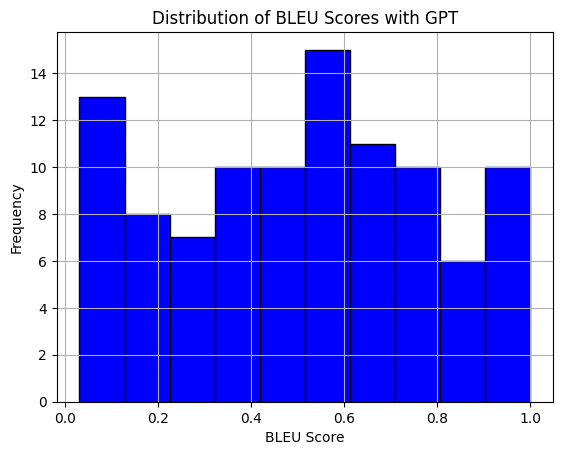

In [ ]:
# Plot histogram of BLEU scores
plt.hist(bleu_scores, bins=10, color='blue', edgecolor='black')
plt.xlabel('BLEU Score')
plt.ylabel('Frequency')
plt.title('Distribution of BLEU Scores with GPT')
plt.grid(True)
plt.show()

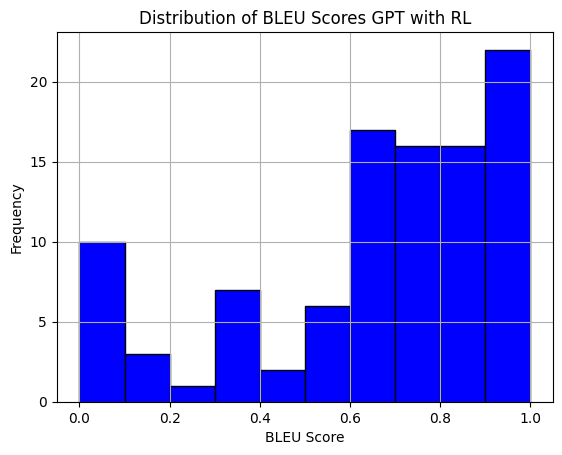

In [ ]:
# Plot histogram of BLEU scores
plt.hist(rl_bleu_scores, bins=10, color='blue', edgecolor='black')
plt.xlabel('BLEU Score')
plt.ylabel('Frequency')
plt.title('Distribution of BLEU Scores GPT with RL')
plt.grid(True)
plt.show()

In [ ]:
# # Plot histogram of BLEU scores
# plt.hist(rl2_bleu_scores, bins=10, color='blue', edgecolor='black')
# plt.xlabel('BLEU Score')
# plt.ylabel('Frequency')
# plt.title('Distribution of BLEU Scores GPT with RL2')
# plt.grid(True)
# plt.show()